<a href="https://colab.research.google.com/github/QuangMinh07112003/My-Projects/blob/main/spaceshiptitanic_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install hvplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 10.5 MB/s eta 0:00:00


In [3]:
!pip install bokeh

In [4]:
!pip install colorama

In [5]:
import pandas as pd
import holoviews as hv



In [6]:
train = pd.read_csv('/content/titanic train.csv')
train


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [7]:
# Step 1: Select only the numeric columns
num_cols = train.select_dtypes(include=['float64', 'int64']).columns

# Step 2: Calculate Q1 and Q3 for each numeric column
Q1 = train[num_cols].quantile(0.005)
Q3 = train[num_cols].quantile(0.995)

# Step 3: Replace values that are lower or higher than Q1 and Q3 respectively with the nearest quantile
for col in num_cols:
    train.loc[train[col] < Q1[col], col] = Q1[col]
    train.loc[train[col] > Q3[col], col] = Q3[col]


In [8]:
test = pd.read_csv('/content/titanic test.csv')
test


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [9]:
# Step 1: Select only the numeric columns
num_cols_test = test.select_dtypes(include=['float64', 'int64']).columns

# Step 2: Calculate Q1 and Q3 for each numeric column in the test set
Q1_test = test[num_cols_test].quantile(0.005)
Q3_test = test[num_cols_test].quantile(0.995)

# Step 3: Replace values that are lower or higher than Q1 and Q3 respectively with the nearest quantile
for col in num_cols_test:
    test.loc[test[col] < Q1_test[col], col] = Q1_test[col]
    test.loc[test[col] > Q3_test[col], col] = Q3_test[col]

In [10]:
# Assuming 'train' is your DataFrame containing the dataset
column_types = train.dtypes

print(column_types)

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object


<Axes: xlabel='HomePlanet'>

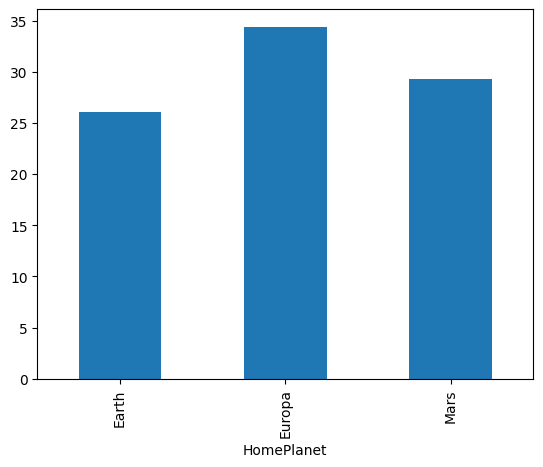

In [11]:
train.groupby('HomePlanet').Age.mean().plot.bar()

<Axes: xlabel='HomePlanet'>

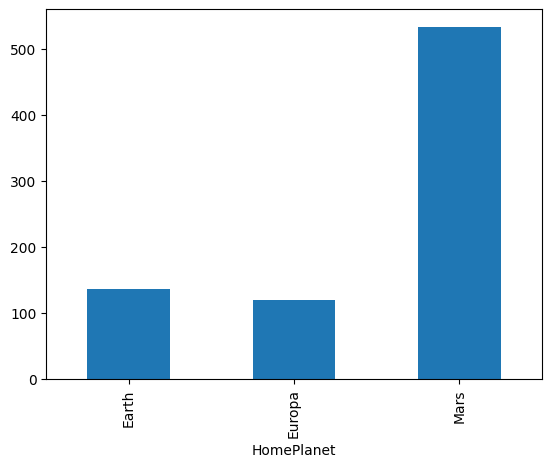

In [12]:
train.groupby('HomePlanet').RoomService.mean().plot.bar()

<Axes: xlabel='HomePlanet'>

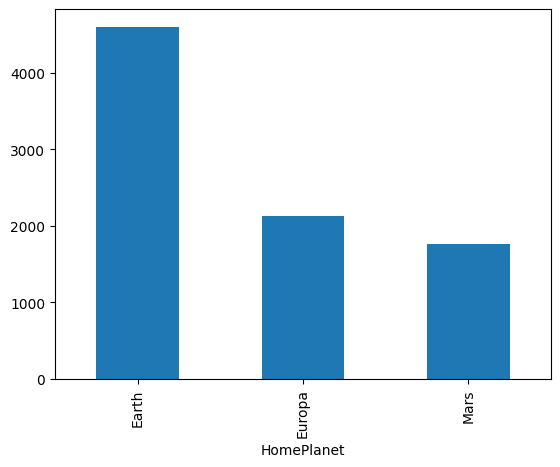

In [13]:
train.groupby('HomePlanet').Transported.count().plot.bar()

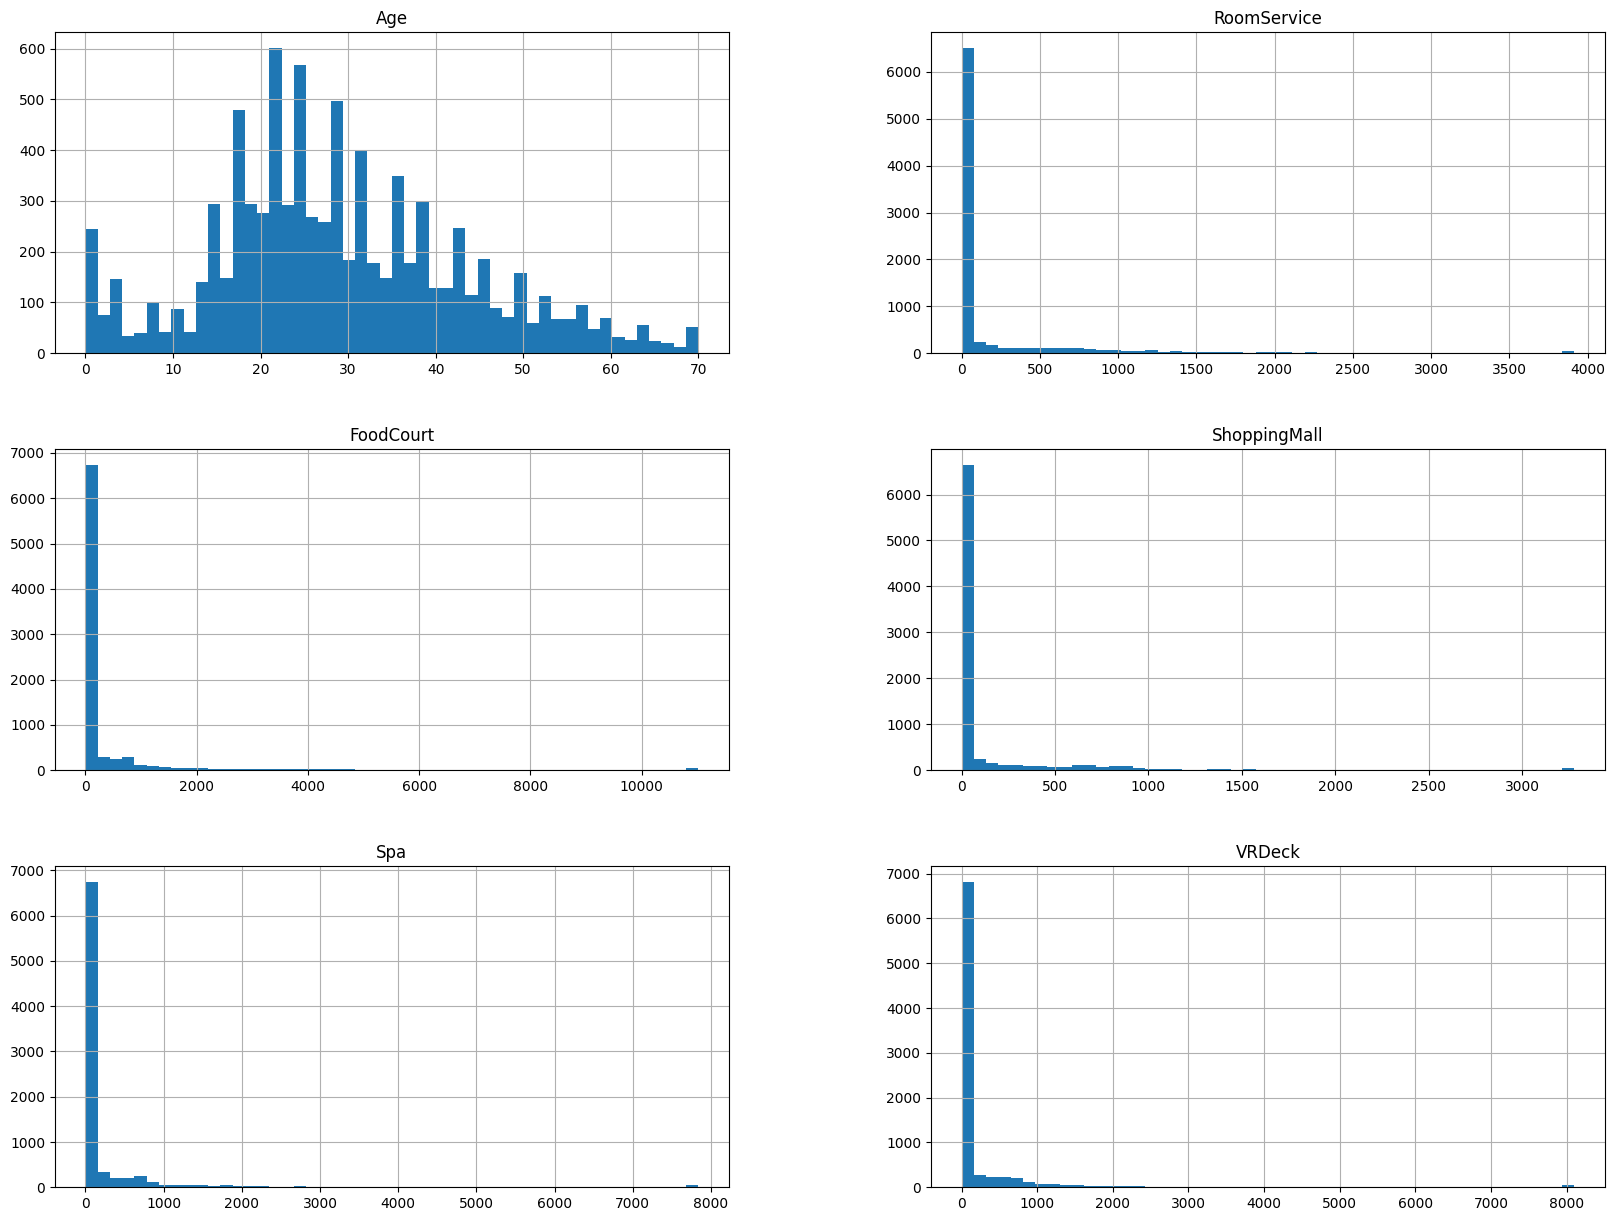

In [14]:
%matplotlib inline
from matplotlib import pyplot as plt

train.hist(bins=50, figsize=(20, 15));

In [15]:
import matplotlib.pyplot as plt

In [16]:
import statsmodels.api as sm
import pandas as pd

In [17]:
import numpy as np
from sklearn.linear_model import LinearRegression


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
import numpy as np
from sklearn.impute import SimpleImputer

num_cols = train.select_dtypes(include=['float64', 'int64']).columns
cat_cols = train.select_dtypes(include=['object']).columns

# Impute numerical columns with standard scaler
num_imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()
train[num_cols] = num_imputer.fit_transform(train[num_cols])

train[num_cols] = scaler.fit_transform(train[num_cols])


# Impute categorical and binary columns with the most frequent value
cat_imputer = SimpleImputer(strategy='most_frequent')
train[cat_cols] = cat_imputer.fit_transform(train[cat_cols])










# label_encoder = LabelEncoder()

# cat_columns = ['PassengerId', 'HomePlanet', 'CryoSleep','Cabin', 'Destination', 'VIP', 'Name']
# num_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# # Create a new dataset with selected columns
# categorical_variable = train[cat_columns]

# categorical_variable

In [19]:
from sklearn.cluster import KMeans

# Step 1: Select only the numeric columns for clustering
num_cols = train.select_dtypes(include=['float64', 'int64'])

# Step 2: Choose the number of clusters (k)
num_clusters = 10  # You can adjust this based on your requirements

# Step 3: Instantiate the KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=0)

# Step 4: Fit the model to the data and predict the cluster labels
train['cluster'] = kmeans.fit_predict(num_cols)

# Now the 'train' DataFrame has an additional 'cluster' column indicating the assigned cluster for each data point

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


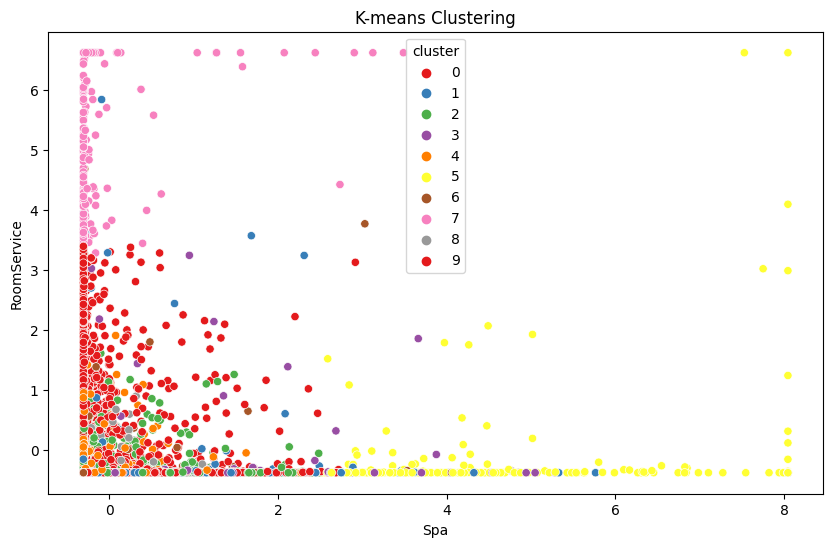

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already performed K-means clustering and added the 'cluster' column to the 'train' DataFrame

# Step 1: Create a scatter plot using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Spa', y='RoomService', data=train, hue='cluster', palette='Set1')
plt.title('K-means Clustering')

# Step 2: Show the plot
plt.show()

In [21]:
train.isnull(). sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
cluster         0
dtype: int64

In [22]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_cols = test.select_dtypes(include=['float64', 'int64']).columns
cat_cols = test.select_dtypes(include=['object']).columns

# Impute numerical columns with standard scaler
num_imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()
test[num_cols] = num_imputer.fit_transform(test[num_cols])
test[num_cols] = scaler.fit_transform(test[num_cols])

# Impute categorical and binary columns with the most frequent value
cat_imputer = SimpleImputer(strategy='most_frequent')
test[cat_cols] = cat_imputer.fit_transform(test[cat_cols])


In [23]:
test.isnull(). sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64

In [24]:
from sklearn.linear_model import LogisticRegression


In [25]:
model = LogisticRegression()


In [26]:
X_train = train.drop("Transported", axis=1)


In [27]:
X_train = train.drop("Transported", axis=1)
y_train = train["Transported"]


In [28]:
X_test = test


In [29]:
X_train1 = X_train.drop("PassengerId", axis=1)
X_train2 = X_train1.drop("Name", axis = 1)
X_train2

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,cluster
0,Europa,False,B/0/P,TRAPPIST-1e,0.715878,False,-0.373840,-0.310772,-0.359889,-0.305558,-0.294481,2
1,Earth,False,F/0/S,TRAPPIST-1e,-0.334072,False,-0.179050,-0.304220,-0.302623,0.279466,-0.248441,0
2,Europa,False,A/0/S,TRAPPIST-1e,2.045814,True,-0.296996,2.292554,-0.359889,6.850053,-0.243210,5
3,Europa,False,A/0/S,TRAPPIST-1e,0.295898,False,-0.373840,0.623251,0.489939,3.241878,-0.092534,5
4,Earth,False,F/1/S,TRAPPIST-1e,-0.894046,False,0.167642,-0.259812,-0.014002,0.296515,-0.292388,8
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,0.855871,True,-0.373840,4.653457,-0.359889,1.445249,-0.217051,1
8689,Earth,True,G/1499/S,PSO J318.5-22,-0.754052,False,-0.373840,-0.310772,-0.359889,-0.305558,-0.294481,0
8690,Earth,False,G/1500/S,TRAPPIST-1e,-0.194079,False,-0.373840,-0.310772,3.928193,-0.304492,-0.294481,6
8691,Europa,False,E/608/S,55 Cancri e,0.225901,False,-0.373840,0.452899,-0.359889,0.070605,3.090487,3


In [30]:
X_test1 = X_test.drop("PassengerId", axis=1)
X_test2 = X_test1.drop("Name", axis = 1)
X_test2

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,True,G/3/S,TRAPPIST-1e,-0.113131,False,-0.388317,-0.315028,-0.362521,-0.304423,-0.289432
1,Earth,False,F/4/S,TRAPPIST-1e,-0.686088,False,-0.388317,-0.308056,-0.362521,2.796153,-0.289432
2,Europa,True,C/0/S,55 Cancri e,0.173347,False,-0.388317,-0.315028,-0.362521,-0.304423,-0.289432
3,Europa,False,C/1/S,TRAPPIST-1e,0.674684,False,-0.388317,4.837953,-0.362521,-0.105626,0.316810
4,Earth,False,F/5/S,TRAPPIST-1e,-0.614468,False,-0.369624,-0.315028,1.061173,-0.304423,-0.289432
...,...,...,...,...,...,...,...,...,...,...,...
4272,Earth,True,G/1496/S,TRAPPIST-1e,0.388206,False,-0.388317,-0.315028,-0.362521,-0.304423,-0.289432
4273,Earth,False,G/160/P,TRAPPIST-1e,0.961163,False,-0.388317,0.341101,-0.324407,-0.293440,-0.140204
4274,Mars,True,D/296/P,55 Cancri e,-0.184751,False,-0.388317,-0.315028,-0.362521,-0.304423,-0.289432
4275,Europa,False,D/297/P,TRAPPIST-1e,-0.184751,False,-0.388317,1.761037,-0.362521,-0.304423,0.252558


In [31]:
# Check the feature names in the training set
print("Training set feature names:", X_train2.columns)

# Check the feature names in the test set
print("Test set feature names:", X_test2.columns)

Training set feature names: Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'cluster'],
      dtype='object')
Test set feature names: Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'],
      dtype='object')


In [32]:
X_train_encoded = pd.get_dummies(X_train2)

X_test_encoded = pd.get_dummies(X_test2)

X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)


In [33]:
X_train_encoded



,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,cluster,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,...,Cabin_T/0/P,Cabin_T/1/P,Cabin_T/2/P,Cabin_T/2/S,Cabin_T/3/P,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
0,0.715878,-0.373840,-0.310772,-0.359889,-0.305558,-0.294481,2,0,1,0,...,0,0,0,0,0,0,0,1,1,0
1,-0.334072,-0.179050,-0.304220,-0.302623,0.279466,-0.248441,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
2,2.045814,-0.296996,2.292554,-0.359889,6.850053,-0.243210,5,0,1,0,...,0,0,0,0,0,0,0,1,0,1
3,0.295898,-0.373840,0.623251,0.489939,3.241878,-0.092534,5,0,1,0,...,0,0,0,0,0,0,0,1,1,0
4,-0.894046,0.167642,-0.259812,-0.014002,0.296515,-0.292388,8,1,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.855871,-0.373840,4.653457,-0.359889,1.445249,-0.217051,1,0,1,0,...,0,0,0,0,0,1,0,0,0,1
8689,-0.754052,-0.373840,-0.310772,-0.359889,-0.305558,-0.294481,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
8690,-0.194079,-0.373840,-0.310772,3.928193,-0.304492,-0.294481,6,1,0,0,...,0,0,0,0,0,0,0,1,1,0
8691,0.225901,-0.373840,0.452899,-0.359889,0.070605,3.090487,3,0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [34]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [35]:
clf = DecisionTreeClassifier()


In [36]:
clf.fit(X_train_encoded, y_train)  # For classification


DecisionTreeClassifier()

In [37]:
y_pred = clf.predict(X_test_encoded)  # For classification
y_pred

array([ True, False,  True, ...,  True,  True,  True])

In [38]:
arr_bool = y_pred.astype(bool)

print(arr_bool)

[ True False  True ...  True  True  True]


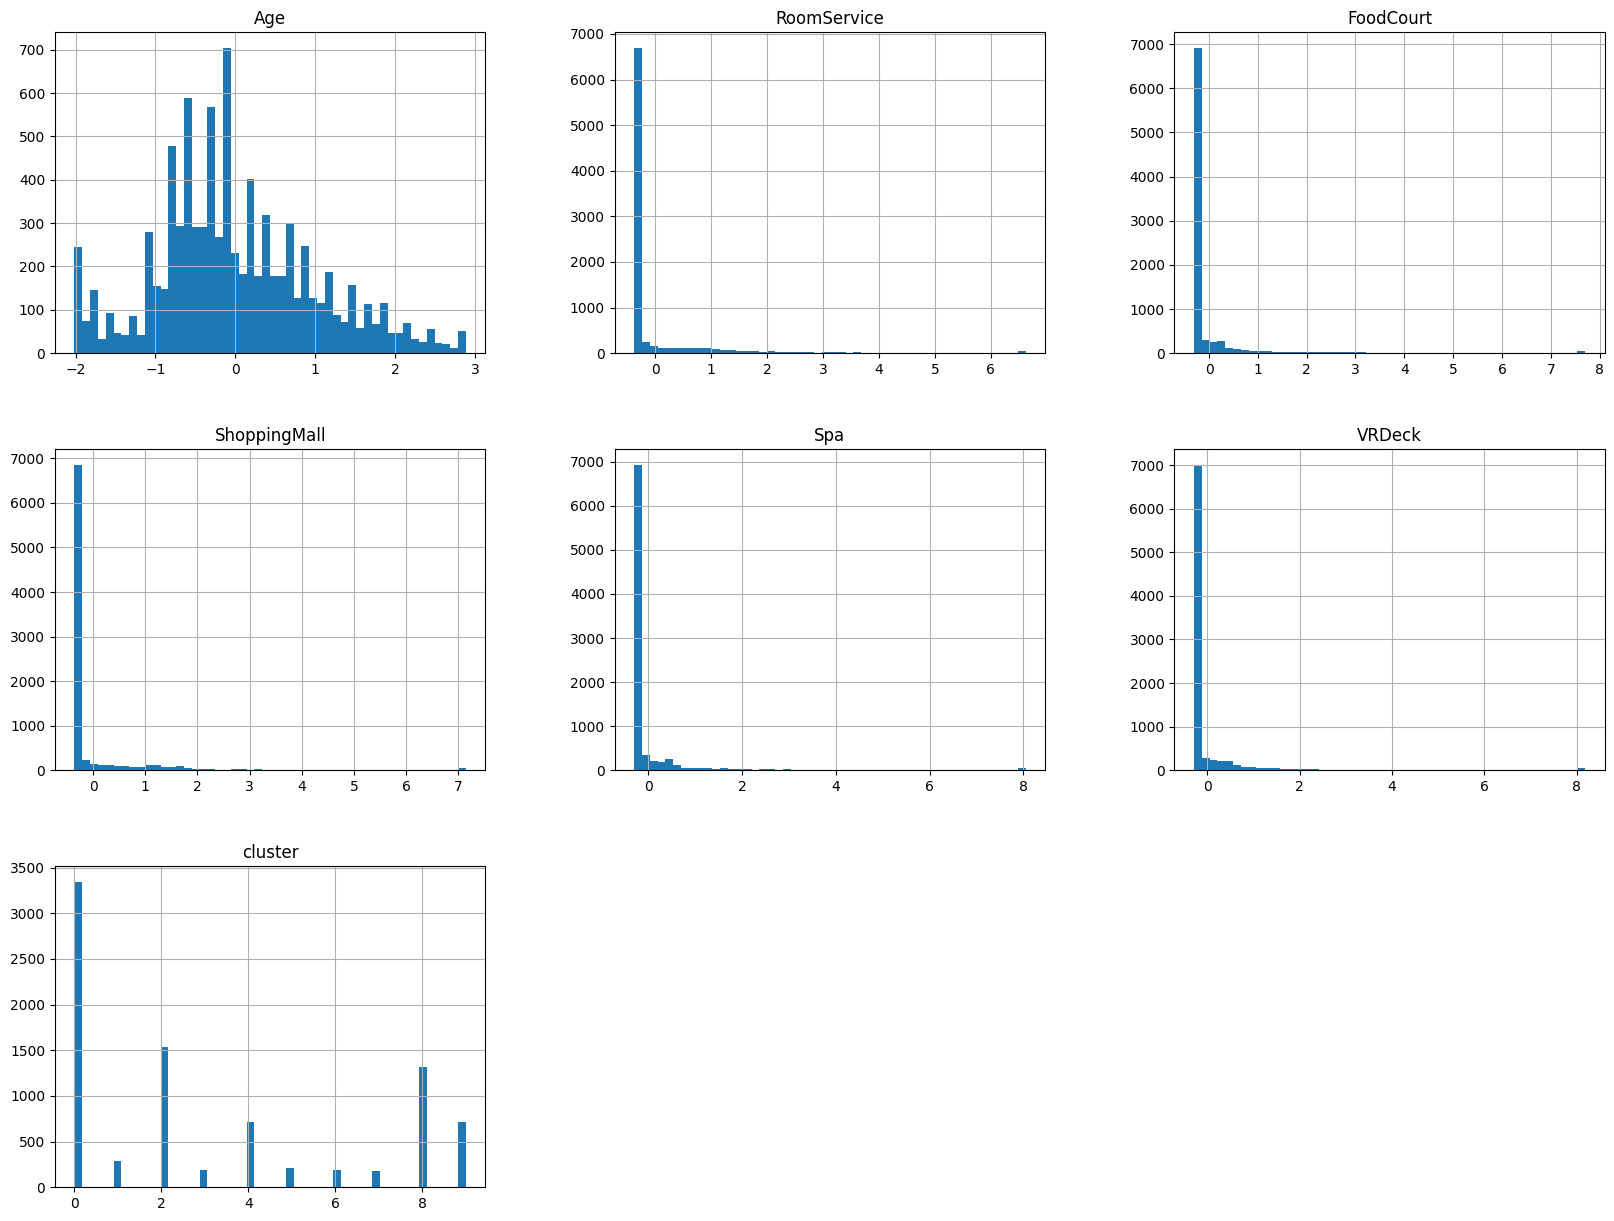

In [39]:
%matplotlib inline
from matplotlib import pyplot as plt

X_train.hist(bins=50, figsize=(20, 15));

In [40]:
import pandas as pd
from colorama import Fore, Style
from tabulate import tabulate

In [41]:
# Format DataFrame as a table
string_array = [f'{Fore.GREEN}True{Style.RESET_ALL}' if value else f'{Fore.RED}False{Style.RESET_ALL}' for value in y_pred]
submission = pd.DataFrame({'Boolean Column': string_array})


table_submission = tabulate(submission, headers='keys', tablefmt='fancy_grid')


In [42]:
table_submission1 = y_pred  # The NumPy array containing the table data

# Convert the NumPy array to a DataFrame
df_pred = pd.DataFrame(table_submission1)

# Save the DataFrame as a CSV file
#df_pred.to_csv('pred.csv', index=False)

In [43]:
pre_submission = pd.concat([X_test, df_pred], axis=1)

In [44]:
column_names = pre_submission.columns.tolist()
column_names

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Name',
 0]

In [45]:
column_names[-1] = "Transported"

In [46]:
ID = pre_submission.iloc[:, 0]  # Selecting the first column
Transported = pre_submission.iloc[:, -1]  # Selecting the last column

# Create a new dataset with only the first and last column
submission111 = pd.concat([ID, Transported], axis=1)

In [47]:
submission111 = submission111.rename(columns={submission111.columns[-1]: "Transported"})



In [48]:
submission111

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [49]:
# Convert the NumPy array to a DataFrame
df_submission = pd.DataFrame(submission111)

# Save the DataFrame as a CSV file
df_submission.to_csv('submission111.csv', index=False)

In [50]:
########################################################################################################################

In [51]:
model = LogisticRegression()

In [52]:
model = model.fit(X_train_encoded, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
predictions = model.predict(X_test_encoded)
predictions

array([ True, False,  True, ...,  True,  True,  True])

In [54]:
predictions.shape

(4277,)

In [55]:
from colorama import Fore, Style
from tabulate import tabulate
import pandas as pd



In [56]:
# Format DataFrame as a table
string_array = [f'{Fore.GREEN}True{Style.RESET_ALL}' if value else f'{Fore.RED}False{Style.RESET_ALL}' for value in predictions]
submission = pd.DataFrame({'Boolean Column': string_array})


table_submission = tabulate(submission, headers='keys', tablefmt='fancy_grid')


In [57]:
table_submission1 = predictions  # The NumPy array containing the table data

# Convert the NumPy array to a DataFrame
df_submission = pd.DataFrame(table_submission1)

# Save the DataFrame as a CSV file
df_submission.to_csv('submission.csv', index=False)

In [58]:
import pandas as pd
import numpy as np

In [59]:
pd_predictions = pd.DataFrame(predictions)

# Concatenate the original dataset and the new DataFrame column-wise
pre_submission = pd.concat([X_test, pd_predictions ], axis=1)

In [60]:
pre_submission

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,0
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,-0.113131,False,-0.388317,-0.315028,-0.362521,-0.304423,-0.289432,Nelly Carsoning,True
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,-0.686088,False,-0.388317,-0.308056,-0.362521,2.796153,-0.289432,Lerome Peckers,False
2,0019_01,Europa,True,C/0/S,55 Cancri e,0.173347,False,-0.388317,-0.315028,-0.362521,-0.304423,-0.289432,Sabih Unhearfus,True
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,0.674684,False,-0.388317,4.837953,-0.362521,-0.105626,0.316810,Meratz Caltilter,True
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,-0.614468,False,-0.369624,-0.315028,1.061173,-0.304423,-0.289432,Brence Harperez,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,0.388206,False,-0.388317,-0.315028,-0.362521,-0.304423,-0.289432,Jeron Peter,True
4273,9269_01,Earth,False,G/160/P,TRAPPIST-1e,0.961163,False,-0.388317,0.341101,-0.324407,-0.293440,-0.140204,Matty Scheron,False
4274,9271_01,Mars,True,D/296/P,55 Cancri e,-0.184751,False,-0.388317,-0.315028,-0.362521,-0.304423,-0.289432,Jayrin Pore,True
4275,9273_01,Europa,False,D/297/P,TRAPPIST-1e,-0.184751,False,-0.388317,1.761037,-0.362521,-0.304423,0.252558,Kitakan Conale,True


In [61]:
column_names = pre_submission.columns.tolist()

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Name',
 0]

In [62]:
column_names[-1] = "Transported"

In [64]:
ID = pre_submission.iloc[:, 0]  # Selecting the first column
Transported = pre_submission.iloc[:, -1]  # Selecting the last column

# Create a new dataset with only the first and last column
submission = pd.concat([ID, Transported], axis=1)

In [65]:
submission

,PassengerId,0
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [66]:
submission = submission.rename(columns={submission.columns[-1]: "Transported"})



In [67]:
submission

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [68]:
# Convert the NumPy array to a DataFrame
df_submission = pd.DataFrame(submission)

# Save the DataFrame as a CSV file
df_submission.to_csv('submission117.csv', index=False)